<a href="https://colab.research.google.com/github/GayatriKarle/Data-Science-Internship-at-AI-Alpha-Tech/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Farmers Protest Tweets Sentimental Analysis**

**You are provided with farmers Protest Tweet Data. You have to implement an algorithm for automatic
classification of text into positive, negative and neutral.
Do a Sentiment Analysis to determine the attitude of the mass is positive, negative and neutral towards Farmers
Protest.**

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/tweets.csv')

In [ ]:
df.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.376739e+18,1.357312e+18,0,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN


**Summary of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908891 entries, 0 to 908890
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tweetUrl         908891 non-null  object 
 1   date             908891 non-null  object 
 2   renderedContent  908891 non-null  object 
 3   tweetId          908891 non-null  float64
 4   userId           908891 non-null  float64
 5   replyCount       908891 non-null  int64  
 6   retweetCount     908891 non-null  int64  
 7   likeCount        908891 non-null  int64  
 8   quoteCount       908891 non-null  int64  
 9   source           896757 non-null  object 
 10  media            251525 non-null  object 
 11  retweetedTweet   0 non-null       float64
 12  quotedTweet      252440 non-null  object 
 13  mentionedUsers   361152 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 97.1+ MB


In [ ]:
df.shape

(908891, 14)

**I select only 4 lakh rows out of 908891**

In [ ]:
df2=df[:400000]

In [ ]:
df2.shape

(400000, 14)

In [ ]:
df2.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.376739e+18,1.357312e+18,0,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN


In [ ]:
df2=df2.drop(columns=df2.drop(columns=['date','renderedContent']))

In [ ]:
df2.head()

,date,renderedContent
0,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the..."


In [ ]:
df2['year']=pd.DatetimeIndex(df2['date']).year

In [ ]:
df2['date'] = pd.to_datetime(df2['date'], errors = 'coerce')
df2["month"] = pd.to_datetime(df2['date']).dt.month
#df2["year"]  = pd.to_datetime(df2['date']).dt.year

In [ ]:
df2.head()

,date,renderedContent,year,month
0,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,2021,3
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",2021,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


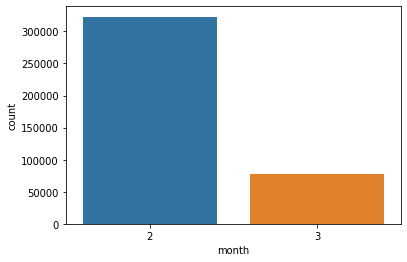

In [ ]:
sns.countplot(df2['month'])

In [ ]:
 nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

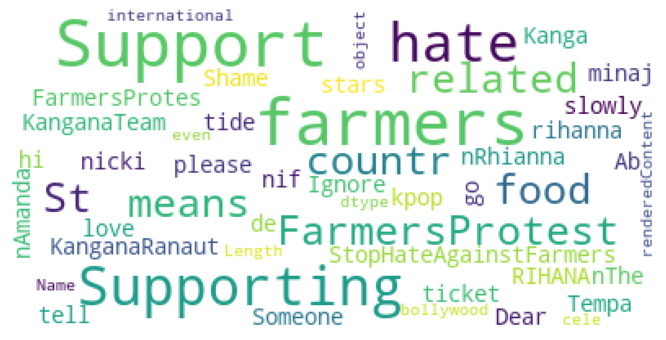

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 4500, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df2['renderedContent'])

# Data Cleaning 
#data Preprocessing

In [ ]:
df2['renderedContent'] = df2['renderedContent'].astype("str").astype("string")

In [ ]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http.*$', '', text)
    text = re.sub(r'FarmersProtest', '', text)
    text = re.sub(r'twitter.com', '', text)
    text = re.sub(r'farmersprotest', '', text)
    text = re.sub(r'tweet', '', text)
    text = re.sub(r'retweet', '', text)
    text = re.sub(r'thi', '', text)
    text = re.sub(r'farmer','', text)
    text = re.sub(r'protest','', text)
    text = re.sub(r'india','', text)
    
    return text

In [ ]:
df2['cleanrenderedContent'] = df2['renderedContent'].apply(wordpre)

In [ ]:
df2.head()

,date,renderedContent,year,month,cleanrenderedContent
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,support
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,supporting s means supporting our country sto...
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,support s if you are related to food stophate...
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,stophateagainsts support by pressurising go...
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,you hate s i hate you if you love them i lov...


In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
df2['cleanrenderedContent'] = df2['cleanrenderedContent'].apply(denoise_text)

In [ ]:
df2.head(50)

,date,renderedContent,year,month,cleanrenderedContent
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,support
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,supporting s means supporting our country sto...
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,support s if you are related to food stophate...
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,stophateagainsts support by pressurising go...
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,you hate s i hate you if you love them i lov...
5,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,2021,3,they can t be s looks like gundas are having ...
6,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,2021,3,lets not forget that our s are still out there...
7,2021-03-30 03:28:49+00:00,@Troll48611422 @Doabapunjab1 @Terminator00096 ...,2021,3,theshivatribe tamankaur sukhisukh...
8,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",2021,3,neutrality helps the oppressor never the vict...
9,2021-03-30 03:28:04+00:00,Why You Should Visit the F.A.R.M.E.R. at Tikri...,2021,3,why you should visit the f a r m e r at tikri...


In [ ]:
def remove_special_characters(text, remove_digits = True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

#Apply function on review column
df2['cleanrenderedContent'] = df2['cleanrenderedContent'].apply(remove_special_characters)

In [ ]:
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df2['cleanrenderedContent'] = df2['cleanrenderedContent'].apply(simple_stemmer)

In [ ]:
df2.head(50)

,date,renderedContent,year,month,cleanrenderedContent
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,support
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,support s mean support our countri stophateaga...
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,support s if you are relat to food stophateaga...
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,stophateagainst support by pressuris got to ac...
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,you hate s i hate you if you love them i love ...
5,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,2021,3,they can t be s look like gunda are have good ...
6,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,2021,3,let not forget that our s are still out there ...
7,2021-03-30 03:28:49+00:00,@Troll48611422 @Doabapunjab1 @Terminator00096 ...,2021,3,theshivatrib tamankaur sukhisukhii amaanbali t...
8,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",2021,3,neutral help the oppressor never the victim si...
9,2021-03-30 03:28:04+00:00,Why You Should Visit the F.A.R.M.E.R. at Tikri...,2021,3,whi you should visit the f a r m e r at tikri ...


In [ ]:
stop = set(stopwords.words('english'))

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


df2['cleanrenderedContent'] = df2['cleanrenderedContent'].apply(remove_stopwords)

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer  = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df2['cleanrenderedContent'] = df2['cleanrenderedContent'].apply(lemmatize_text)

In [ ]:
df2.head(20)

,date,renderedContent,year,month,cleanrenderedContent
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,[support]
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,"[support, mean, support, countri, stophateagai..."
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,"[support, relat, food, stophateagainst]"
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,"[stophateagainst, support, pressuris, got, acc..."
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,"[hate, hate, love, love, stophateagainst]"
5,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,2021,3,"[look, like, gunda, good, time, seem, violenc,..."
6,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,2021,3,"[let, forget, still, ing, plea, pray]"
7,2021-03-30 03:28:49+00:00,@Troll48611422 @Doabapunjab1 @Terminator00096 ...,2021,3,"[theshivatrib, tamankaur, sukhisukhii, amaanba..."
8,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",2021,3,"[neutral, help, oppressor, never, victim, sile..."
9,2021-03-30 03:28:04+00:00,Why You Should Visit the F.A.R.M.E.R. at Tikri...,2021,3,"[whi, visit, f, r, e, r, tikri, border, least,..."


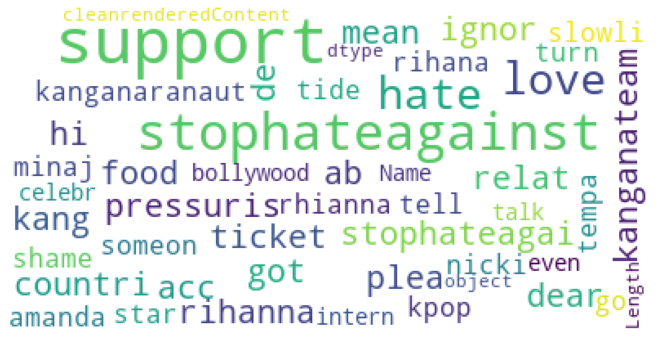

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 4500, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df2['cleanrenderedContent'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   date                  400000 non-null  datetime64[ns, UTC]
 1   renderedContent       400000 non-null  string             
 2   year                  400000 non-null  int64              
 3   month                 400000 non-null  int64              
 4   cleanrenderedContent  400000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(1), string(1)
memory usage: 15.3+ MB


In [ ]:
df2['cleanrenderedContent'] = df2['cleanrenderedContent'].astype("str").astype("string")

In [ ]:
df2['sentiment'] = df2['cleanrenderedContent'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2.head()

,date,renderedContent,year,month,cleanrenderedContent,sentiment
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,['support'],0.0000
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,"['support', 'mean', 'support', 'countri', 'sto...",-0.3125
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,"['support', 'relat', 'food', 'stophateagainst']",0.0000
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,"['stophateagainst', 'support', 'pressuris', 'g...",0.0000
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,"['hate', 'hate', 'love', 'love', 'stophateagai...",-0.1500


In [ ]:
negative_words = ''
neutral_words  = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, sentiment in zip(df2['cleanrenderedContent'], df2.sentiment):
    tokens = comment.split()
    
    for word in tokens:
        if sentiment < 0:
            negative_words += word + ' '
        elif sentiment == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [ ]:
negative_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                          min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(positive_words)

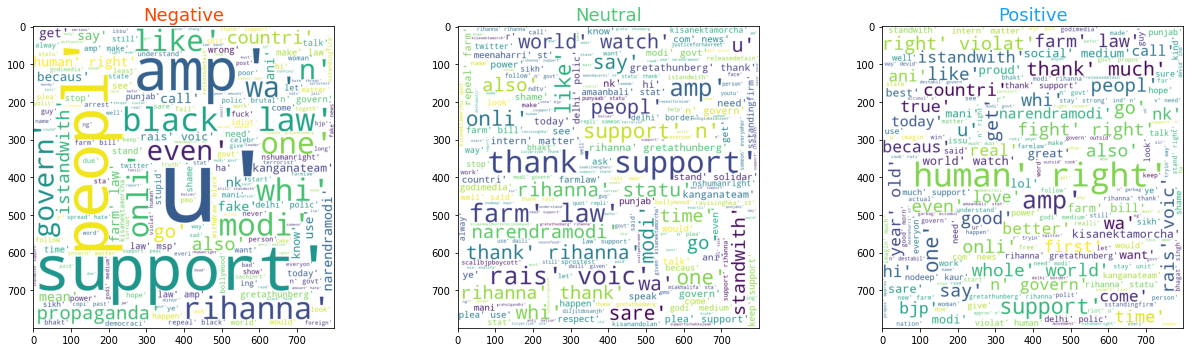

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5), facecolor = None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize = 18, color = '#ff4500')

ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize = 18, color = '#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize = 18, color = '#1DA1F2')

plt.tight_layout()

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['sentiment'] = df2['sentiment'].apply(getAnalysis )

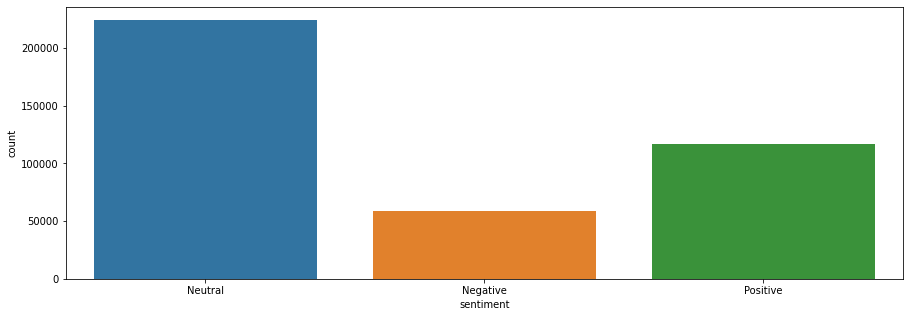

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(df2['sentiment'])

In [ ]:
df2.head()

,date,renderedContent,year,month,cleanrenderedContent,sentiment
0,2021-03-30 03:33:46+00:00,Support 👇 #FarmersProtest,2021,3,['support'],Neutral
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,2021,3,"['support', 'mean', 'support', 'countri', 'sto...",Negative
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,2021,3,"['support', 'relat', 'food', 'stophateagainst']",Neutral
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,2021,3,"['stophateagainst', 'support', 'pressuris', 'g...",Neutral
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, if you love them...",2021,3,"['hate', 'hate', 'love', 'love', 'stophateagai...",Negative


In [ ]:
df2['sentiment'] = df2.sentiment.map({'Negative':-1,'Neutral':0,'Positive':1})

In [ ]:
df2['sentiment'].value_counts()

 0    224129
 1    116991
-1     58880
Name: sentiment, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2['cleanrenderedContent'], df2['sentiment'], 
                                                    test_size = 0.2, random_state = 2020)

In [ ]:
x_train.shape
x_test.shape

(80000,)

**Logistic Regression**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction    = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 98.1%


Text(0.5, 15.0, 'Predicted label')

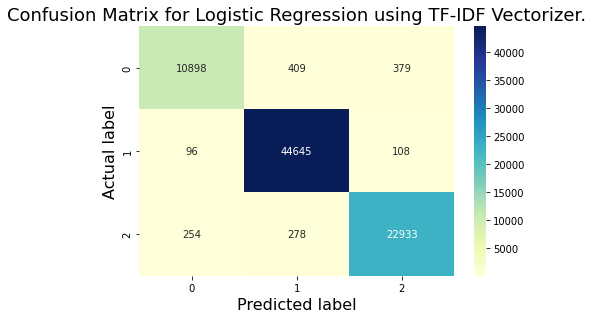

In [ ]:
cm_test = confusion_matrix(y_test, prediction)
sns.heatmap(pd.DataFrame(cm_test), annot = True, cmap = "YlGnBu" , fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression using TF-IDF Vectorizer.', y = 1.1, fontsize = 18)
plt.ylabel('Actual label', fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)

In [ ]:
print('Classification Report for Logistic Regression is : \n', classification_report(y_test, prediction))

Classification Report for Logistic Regression is : 
               precision    recall  f1-score   support

          -1       0.97      0.93      0.95     11686
           0       0.98      1.00      0.99     44849
           1       0.98      0.98      0.98     23465

    accuracy                           0.98     80000
   macro avg       0.98      0.97      0.97     80000
weighted avg       0.98      0.98      0.98     80000



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction        = RandomForestmodel.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 96.72%


Text(0.5, 15.0, 'Predicted label')

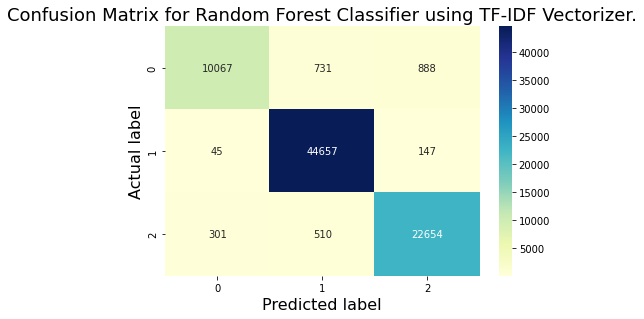

In [ ]:
cm_test = confusion_matrix(y_test, prediction)
sns.heatmap(pd.DataFrame(cm_test), annot = True, cmap = "YlGnBu" , fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest Classifier using TF-IDF Vectorizer.', y = 1.1, fontsize = 18)
plt.ylabel('Actual label', fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)

In [ ]:
print('Classification Report for Random Forest Classifier is : \n', classification_report(y_test, prediction))

Classification Report for Random Forest Classifier is : 
               precision    recall  f1-score   support

          -1       0.97      0.86      0.91     11686
           0       0.97      1.00      0.98     44849
           1       0.96      0.97      0.96     23465

    accuracy                           0.97     80000
   macro avg       0.97      0.94      0.95     80000
weighted avg       0.97      0.97      0.97     80000



**Conclusion**

* Peoples are in side of farmers.
* A lot of people have spoken positive by the side of farmers. and more peoples are neutral.